In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_palette("colorblind")
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression

In [4]:
selected_cbg_brand = pd.read_csv('selected_cbg_brand.csv', index_col = 'cbg')
selected_cbg_stats = pd.read_csv('selected_cbg_stats.csv')

# lasso for education

In [5]:
X = selected_cbg_brand.div(selected_cbg_brand.sum(axis=1), axis=0)
y = selected_cbg_stats['bachelor_or_higher']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [6]:
lasso = LassoCV().fit(X_train, y_train)
pred = lasso.predict(X_test)
predtr = lasso.predict(X_train)

In [7]:
print("correlation between predicted vs actual in test set", stats.pearsonr(pred, y_test))
print("correlation between predicted vs actual in training set", stats.pearsonr(predtr, y_train))

correlation between predicted vs actual in test set PearsonRResult(statistic=0.7919299474593439, pvalue=0.0)
correlation between predicted vs actual in training set PearsonRResult(statistic=0.8093302991783005, pvalue=0.0)


In [8]:
lasso.score(X_train, y_train)

0.6545385246720461

In [9]:
lasso.alpha_

3.0018736927796115e-06

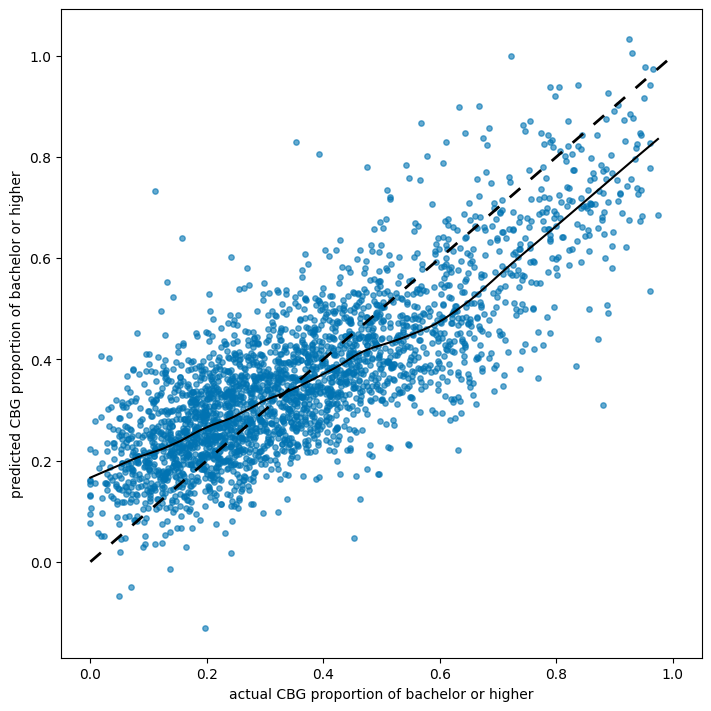

In [ ]:
plt.figure(figsize=(7, 7), constrained_layout=True)

plt.xlabel("actual CBG proportion of bachelor or higher")
plt.ylabel("predicted CBG proportion of bachelor or higher")

x = y_test
y = pred
plt.scatter(x, y, s = 15, alpha = 0.6)

lowess_x, lowess_y = lowess(y, x, 0.2).T

plt.plot(list(np.linspace(0, 1, 1000)), list(np.linspace(0, 1, 1000)), "--",color = "black", linewidth = 2, dashes=(5, 5))
plt.plot(lowess_x, lowess_y, color = "black")

plt.show() 
#plt.savefig('Appendix/FigureE1.png', dpi = 300)

In [11]:
sum(lasso.coef_ != 0)

402